Data type: uint8
Min. value: 0
Max value: 255
shape: (537, 537, 3)


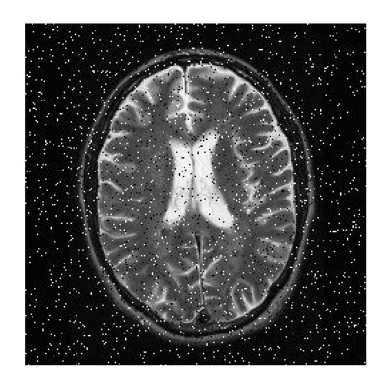

In [ ]:
import numpy as np
import scipy.ndimage as ndi
from skimage import io, img_as_ubyte, color, exposure, filters, feature, morphology
import matplotlib.pyplot as plt
import skimage.exposure as ex
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label
import math


im = io.imread('mri.jpg')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())
print('shape:', im.shape)


plt.imshow(im)
plt.axis('off')
plt.show()

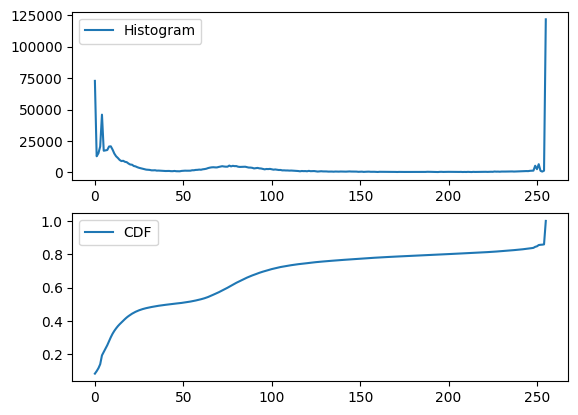

In [2]:
hist = ndi.histogram(im, min=0, max=255, bins=256)
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(hist, label='Histogram')
axes[0].legend()

axes[1].plot(cdf, label='CDF')
axes[1].legend();

In [3]:
gray = color.rgb2gray(im)
weights = np.full ((3,3), 1/9)
weights

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

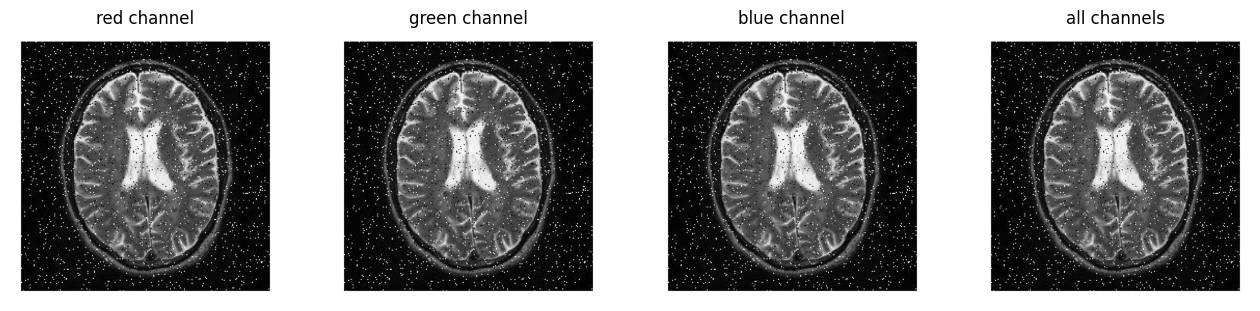

In [4]:
# --- tetapkan setiap channel warna ke variabel yang berbeda ---
#from skimage import io
#image = io.imread()

r = im[:, :, 0]
g = im[..., 1 ] 
b = im[..., 2]

# --- Tampilkan citra dari channel R, G, B ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Disini, kita buat tumpukan layer RGB ---
#     untuk membentuk citra berwarna ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

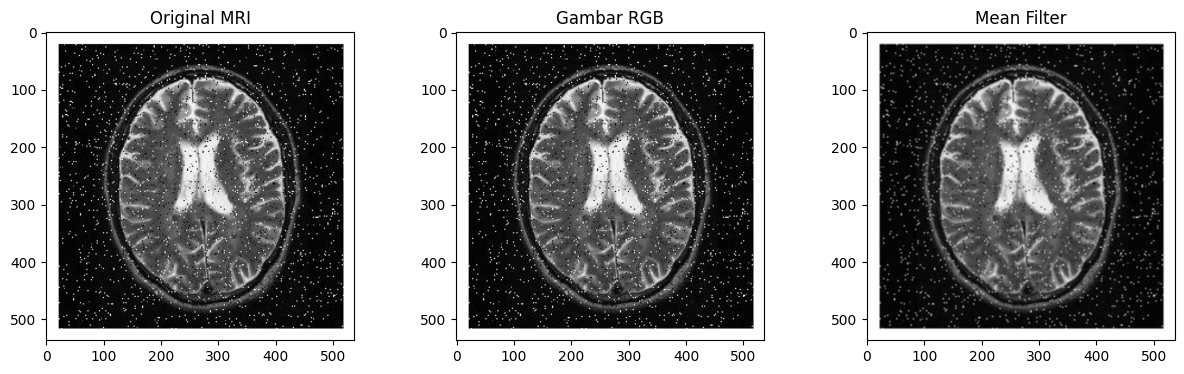

In [5]:
#Mean Filter
im_filt = ndi.convolve(gray, weights)
fig, axes = plt.subplots(1, 3, figsize=(15,4))
axes[0].imshow(im, cmap='grey')
axes[0].set_title('Original MRI')
axes[1].imshow(gray, cmap='grey')
axes[1].set_title('Gambar RGB')
axes[2].imshow(im_filt,cmap = 'grey')
axes[2].set_title('Mean Filter')

plt.show()

In [6]:
#Menghitung mse
def calculate_mse(original, filtered):
    return np.mean((original - filtered) ** 2)

#menghitung psnr
def calculate_psnr(original, filtered):
    mse = calculate_mse(original, filtered)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255.0
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))

#Gaussian Filter


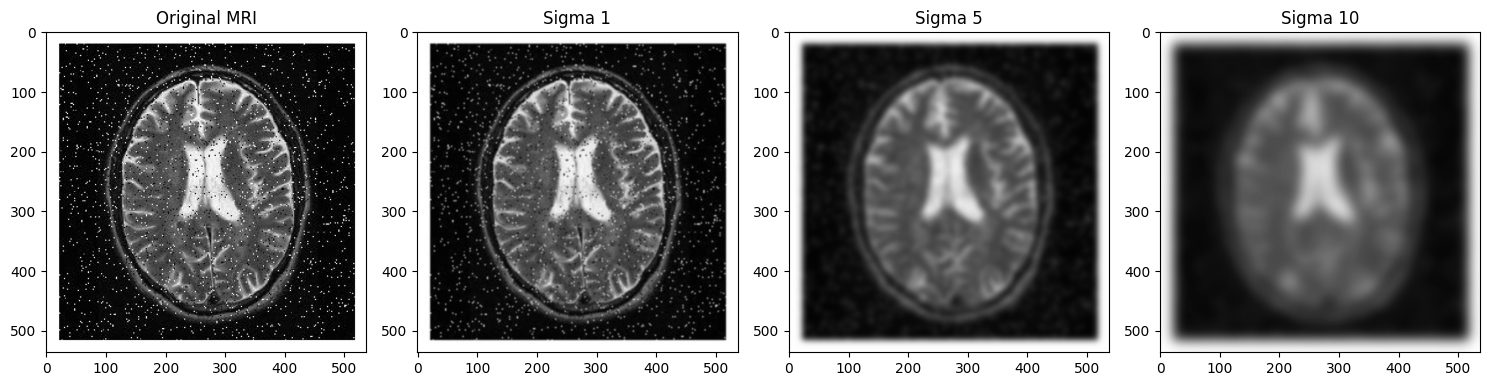

In [7]:
filtered_gaussian_1 = ndi.gaussian_filter(im, sigma=1)
filtered_gaussian_2 = ndi.gaussian_filter(im, sigma=5)
filtered_gaussian_3 = ndi.gaussian_filter(im, sigma=10)

fig, axes = plt.subplots(1,4, figsize=(15,4))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original MRI')
axes[1].imshow(filtered_gaussian_1, cmap='gray')
axes[1].set_title('Sigma 1')
axes[2].imshow(filtered_gaussian_2, cmap='gray')
axes[2].set_title('Sigma 5')
axes[3].imshow(filtered_gaussian_3, cmap='gray')
axes[3].set_title('Sigma 10')

plt.tight_layout()
plt.show()

Filter Non-Linier

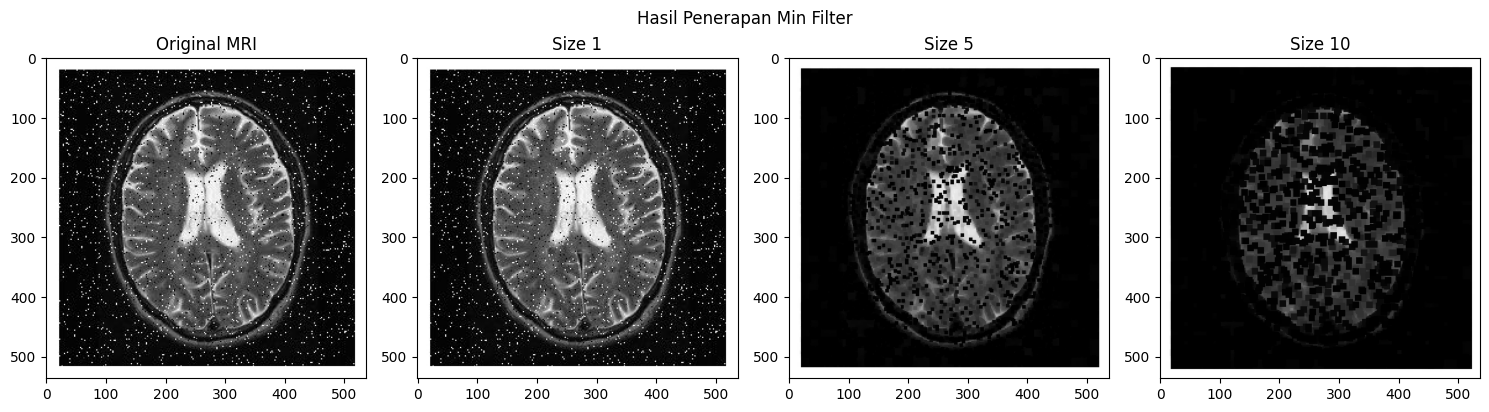

In [8]:
#Min Filter
min_filtered_1 = ndi.minimum_filter(im, size=1)
min_filtered_2 = ndi.minimum_filter(im, size=5)
min_filtered_3 = ndi.minimum_filter(im, size=10)

fig, axes = plt.subplots(1,4, figsize=(15,4))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original MRI')
axes[1].imshow(min_filtered_1, cmap='gray')
axes[1].set_title('Size 1')
axes[2].imshow(min_filtered_2, cmap='gray')
axes[2].set_title('Size 5')
axes[3].imshow(min_filtered_3, cmap='gray')
axes[3].set_title('Size 10')

# Judul utama untuk seluruh gambar
fig.suptitle('Hasil Penerapan Min Filter')
plt.tight_layout()
plt.show()

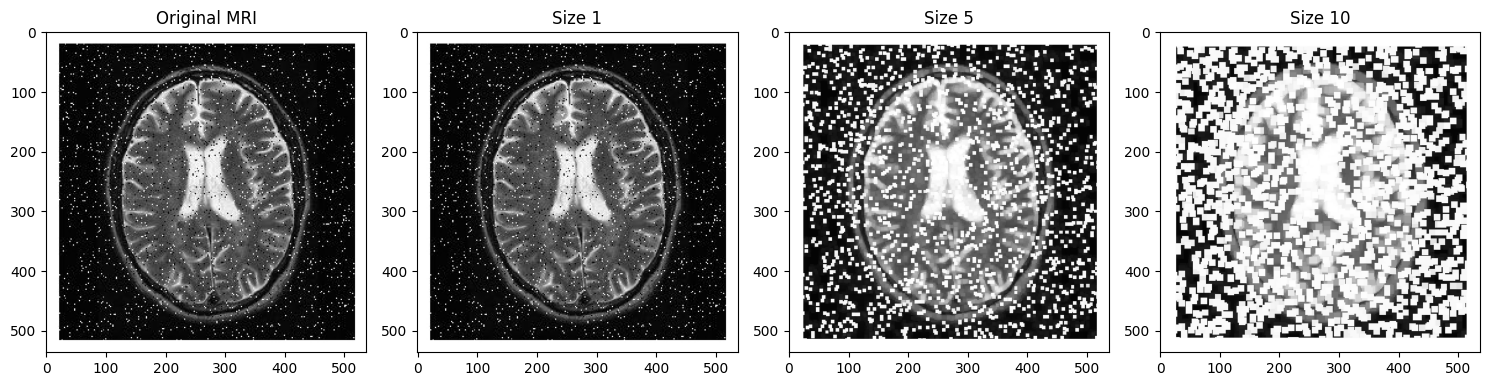

In [9]:
#Max Filter
max_filtered_1 = ndi.maximum_filter(im, size=1)
max_filtered_2 = ndi.maximum_filter(im, size=5)
max_filtered_3 = ndi.maximum_filter(im, size=10)

fig, axes = plt.subplots(1,4, figsize=(15,4))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original MRI')
axes[1].imshow(max_filtered_1, cmap='gray')
axes[1].set_title('Size 1')
axes[2].imshow(max_filtered_2, cmap='gray')
axes[2].set_title('Size 5')
axes[3].imshow(max_filtered_3, cmap='gray')
axes[3].set_title('Size 10')


plt.tight_layout()
plt.show()

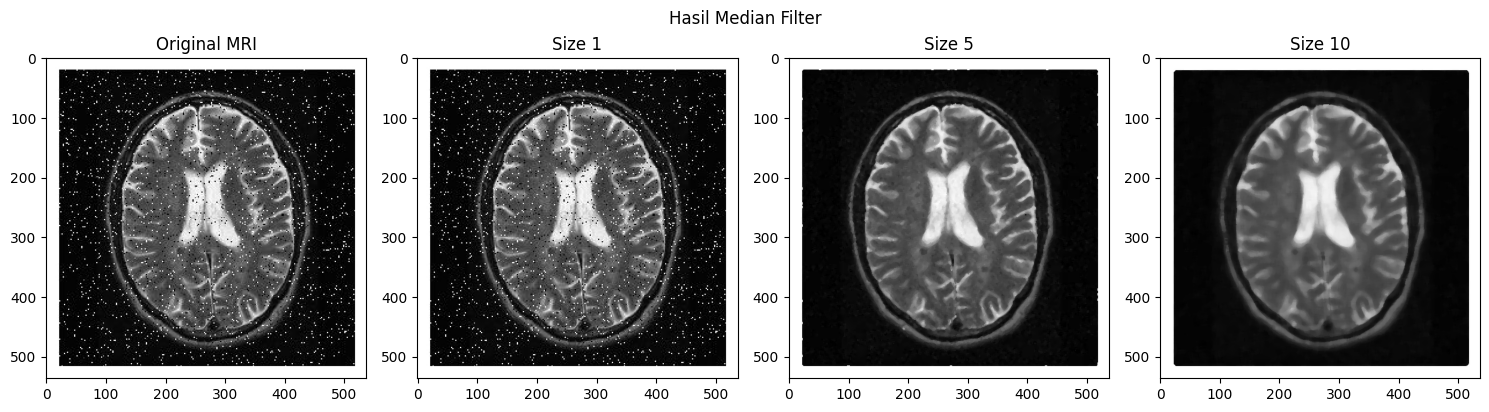

In [10]:
#Median Filter
median_filtered_1 = ndi.median_filter(im, size=1)
median_filtered_2 = ndi.median_filter(im, size=5)
median_filtered_3 = ndi.median_filter(im, size=10)

fig, axes = plt.subplots(1,4, figsize=(15,4))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original MRI')
axes[1].imshow(median_filtered_1, cmap='gray')
axes[1].set_title('Size 1')
axes[2].imshow(median_filtered_2, cmap='gray')
axes[2].set_title('Size 5')
axes[3].imshow(median_filtered_3, cmap='gray')
axes[3].set_title('Size 10')

fig.suptitle('Hasil Median Filter')
plt.tight_layout()
plt.show()

In [11]:
def enl(image):
    return np.mean(image)**2/np.var(image)

def nm(image,im):
    return np.mean(image)/np.mean(im)


def mse(image,im): 
    image = image.astype(np.int64)
    im = im.astype(np.int64)
    M, N = gray.shape

    mse_value = 0
    for x in range(M):
        for y in range(N):
            mse_value += (im[x,y] - image[x,y])**2
    mse_value=mse_value/(M*N)
    mse_fin = np.mean(mse_value)
    return mse_fin

from math import log10
def psnr(image,im):
    return 10*log10(255**2/(mse(image,im)))

MSE =[]
PSNR=[]


for evaluasi in [im_filt,
                 filtered_gaussian_1,filtered_gaussian_2,filtered_gaussian_3,
                 max_filtered_1,max_filtered_2,max_filtered_3,
                 min_filtered_1,min_filtered_2,min_filtered_3,
                 median_filtered_1,median_filtered_2,median_filtered_3]:
    MSE.append(mse(evaluasi,im))
    PSNR.append(psnr(evaluasi,im))

from pandas import DataFrame
df = DataFrame({'Filter':['Mean Filter', 
                 'filtered_gaussian_1','filtered_gaussian_2','filtered_gaussian_3',
                 'max_filtered_1','max_filtered_2','max_filtered_3',
                 'min_filtered_1','min_filtered_2','min_filtered_3',
                 'median_filtered_1','median_filtered_2','median_filtered_3'],
                'MSE':MSE,
                'PSNR':PSNR})
df

C:\Users\Leony\AppData\Local\Temp\ipykernel_29640\3916142900.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return 10*log10(255**2/(mse(image,im)))


Filter           MSE       PSNR
0           Mean Filter  15455.005701   6.240112
1   filtered_gaussian_1    556.608637  20.675304
2   filtered_gaussian_2   1705.144603  15.813191
3   filtered_gaussian_3   2418.593687  14.295174
4        max_filtered_1      0.000000        inf
5        max_filtered_2   8139.458922   9.024848
6        max_filtered_3  21335.454421   4.839785
7        min_filtered_1      0.000000        inf
8        min_filtered_2   3247.934768  13.014731
9        min_filtered_3   6074.328139  10.295821
10    median_filtered_1      0.000000        inf
11    median_filtered_2   1075.280966  17.815584
12    median_filtered_3   1358.877494  16.799001

IMAGE PROCESSING

<class 'numpy.ndarray'>
uint8
(537, 537)
0 255


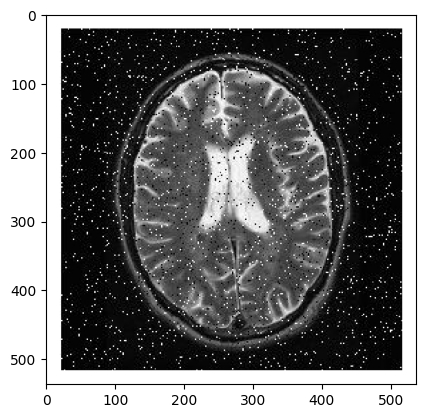

In [12]:
# cara singkat state kernel atau weight

weights = np.full((3,3), 1/9)
weights

# Transformasi dari RGB ke Gray
img = color.rgb2gray(im)
img = img_as_ubyte(img)  #convert tipe data to uint8

# Untuk cek tipe data image
print(type(img)) 
print(img.dtype)
print(img.shape)
print(img.min(), img.max()) # Rentang image

plt.imshow(img, cmap='gray')

In [13]:
# #im = cv2.imread('mri.jpg')
# #im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# phase_separation = im[:947]
# phase_separation = np.squeeze(phase_separation)
# plt.imshow(phase_separation, cmap='gray')


Text(0.5, 1.0, 'Histogram of gray values')

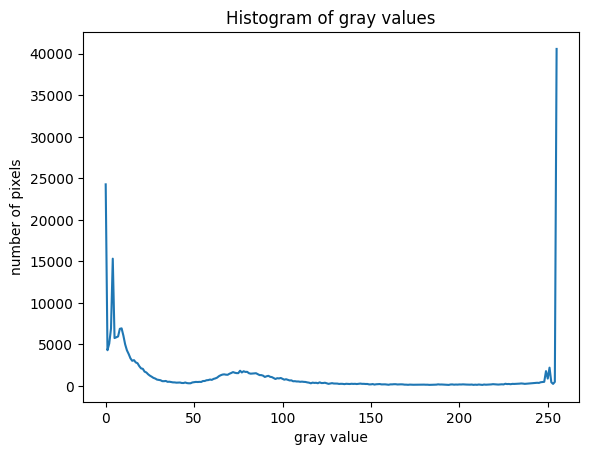

In [14]:
histogram = ndi.histogram(img, min=0, max=255, bins=256)

#histogram = exposure.histogram(phase_separation)
plt.plot(histogram)
plt.xlabel('gray value')
plt.ylabel('number of pixels')
plt.title('Histogram of gray values')


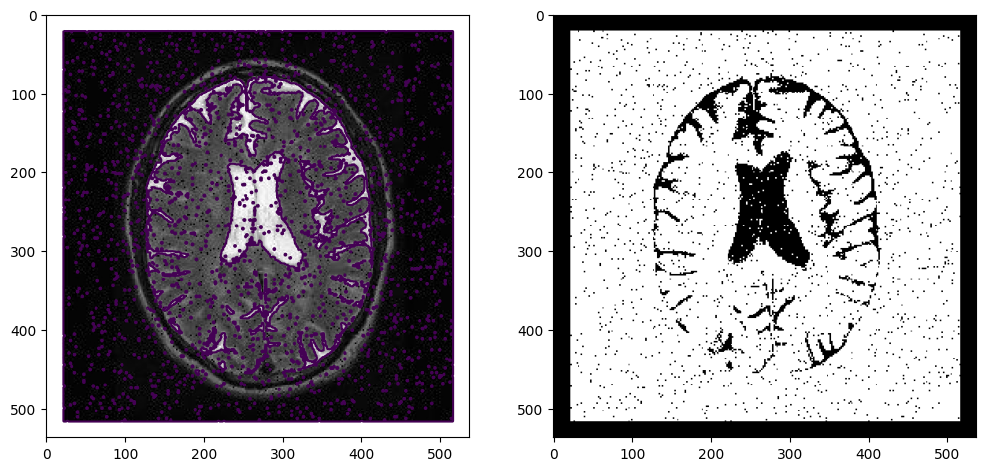

In [15]:
threshold = filters.threshold_otsu(img) #deteksi otomatis nilai threshold yg pas
threshold

# Squeeze the dimensions of img
img = np.squeeze(img)

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(img, cmap='gray')
ax[0].contour(img, [threshold])  # contour pada daerah threshold
ax[1].imshow(img < threshold, cmap='gray')
plt.show()

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

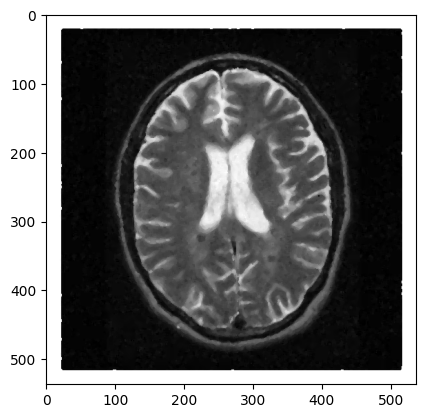

In [16]:
median_filtered_image = filters.median(img, np.ones((5, 5)))
plt.imshow(median_filtered_image, cmap='gray')

cek = np.ones((7,7))
cek




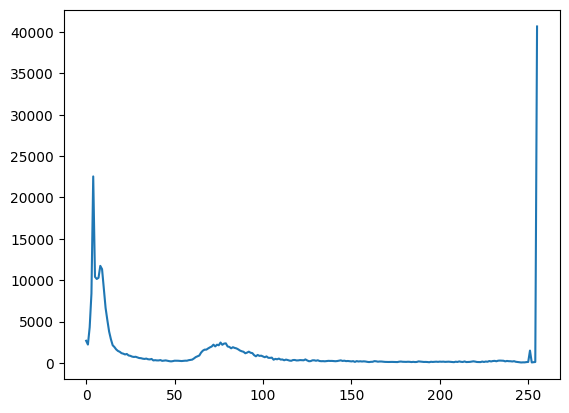

In [17]:
histo_median = ndi.histogram(median_filtered_image, min=0, max=255, bins=256)
plt.plot(histo_median)

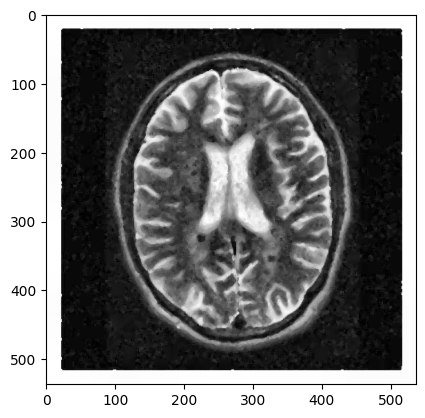

In [18]:
# Adaptive Histogram Equalization

img_hieq = exposure.equalize_adapthist(median_filtered_image, clip_limit=0.01)*255 # Biasanya 0.01
img_hieq = img_hieq.astype('uint8')

plt.imshow(img_hieq, cmap='gray')

Otsu's threshold value: 134


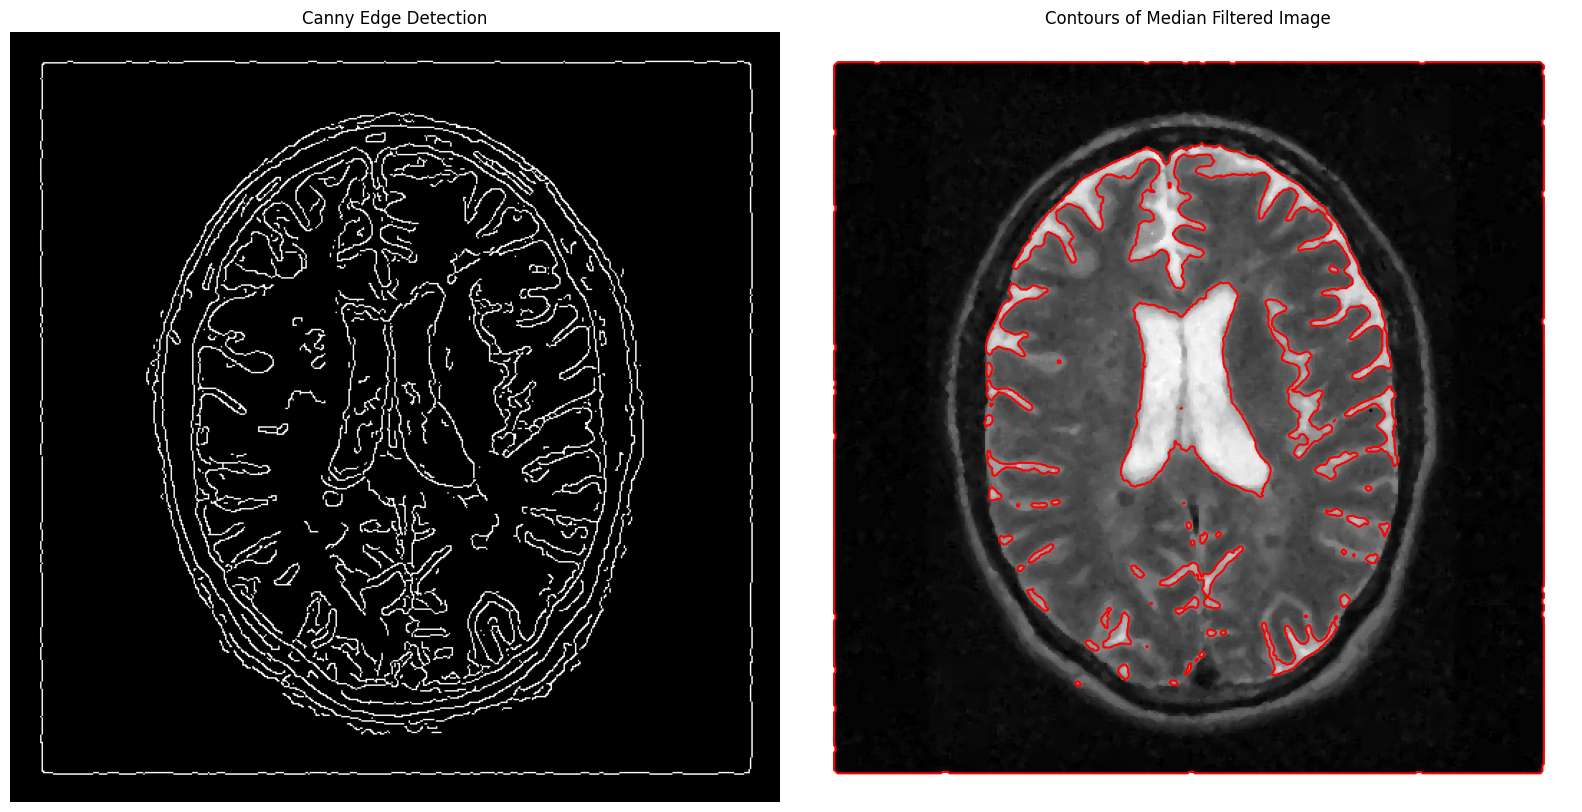

In [19]:
edges_canny = feature.canny(median_filtered_image)

# Apply Otsu's thresholding
threshold2 = filters.threshold_otsu(median_filtered_image)
print("Otsu's threshold value:", threshold2)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot Canny Edge Detection
axes[0].imshow(edges_canny, cmap='gray')
axes[0].set_title('Canny Edge Detection')
axes[0].axis('off')

# Plot Contours based on the threshold
axes[1].imshow(median_filtered_image, cmap='gray')
axes[1].contour(median_filtered_image, levels=[threshold2], colors='red')  # Contours based on the threshold of the original filtered image
axes[1].set_title("Contours of Median Filtered Image")
axes[1].axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

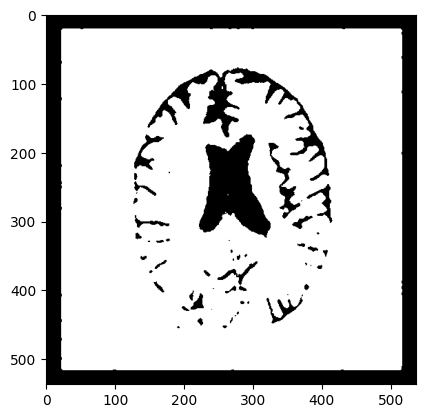

In [ ]:
#Set to binary image
binary_image = median_filtered_image < threshold2
plt.imshow(binary_image, cmap='gray')


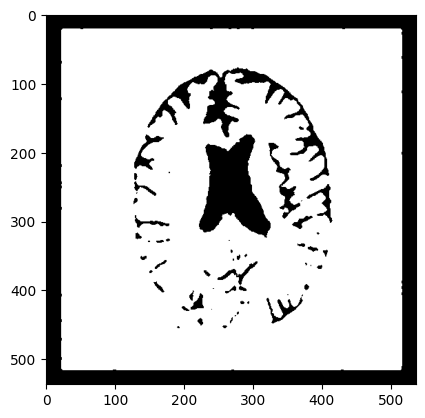

In [21]:
#Remove small objects
only_large_blobs = morphology.remove_small_objects(binary_image, min_size=300)
plt.imshow(only_large_blobs, cmap='gray')

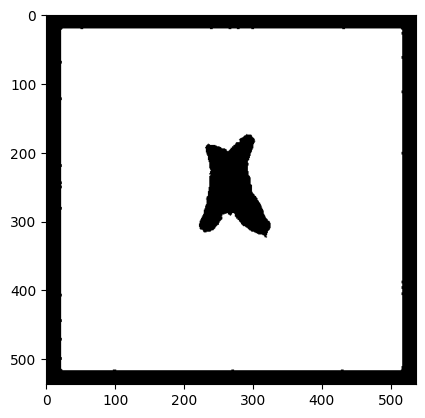

In [ ]:
#Fill small holes
only_large = np.logical_not(morphology.remove_small_objects(
                                    np.logical_not(only_large_blobs), 
                                                   min_size=8000))

image_segmented = only_large
plt.imshow(image_segmented, cmap='gray')
plt.title()


In [23]:
# imots = img_as_ubyte(imots)  #convert tipe data to uint8
image_segmented = img_as_ubyte(image_segmented)  #convert tipe data to uint8

# Untuk cek tipe data image
print(type(image_segmented)) 
print(image_segmented.dtype)
print(image_segmented.shape)
print(image_segmented.min(), image_segmented.max()) # Rentang image

<class 'numpy.ndarray'>
uint8
(537, 537)
0 255


In [24]:
labels, nlabels = ndi.label(image_segmented)

label_arrays = []
#for label_num in range(1, nlabels+1):  
    
  #  label_mask = np.where(labels == label_num, 1, 0)
 #   label_arrays.append(image_segmented)

print('There are {} separate components / objects detected.'.format(nlabels))


There are 1 separate components / objects detected.


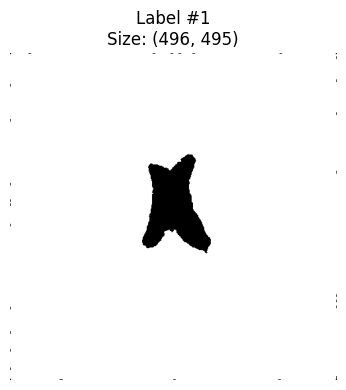

In [25]:
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig = plt.figure(figsize=(6, 4))

obj_index = ndi.find_objects(labels)[0]  # Change index as needed (e.g., [0] for the first object)
cell = image_segmented[obj_index]

plt.imshow(cell, cmap='gray')
plt.axis('off')
plt.title('Label #1\nSize: {}'.format(cell.shape))
    # plt.set_title('Label #{}\nSize: {}'.format(ii+1, cell.shape))

plt.tight_layout()
plt.show()

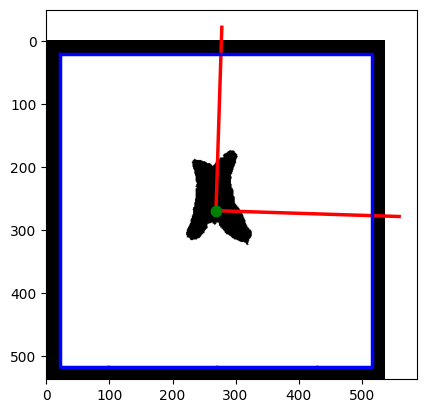

In [28]:
image = image_segmented
labels, nlabels = ndi.label(image_segmented)

label_img = label(image)
regions = regionprops(label_img)
label_img


fig, ax = plt.subplots()
ax.imshow(image_segmented, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

# ax.axis((0, 600, 600, 0))
plt.show()

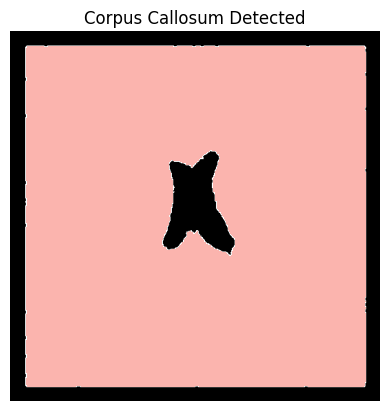

In [27]:
from matplotlib.colors import ListedColormap
# rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(image_segmented, cmap='gray')
plt.imshow(labels_for_display, cmap='Pastel1')
plt.axis('off')
plt.title('Corpus Callosum Detected'.format(nlabels))
plt.show()
